In [2]:
%load_ext autoreload
%autoreload 2

<Axes: xlabel='date'>

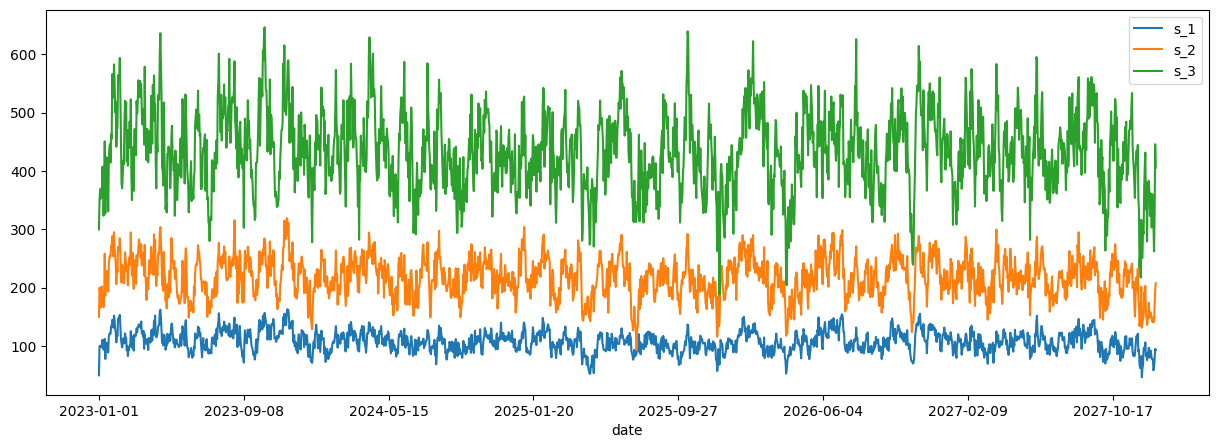

In [ ]:
import pandas as pd

df = pd.read_csv("data/linear_dep_time_series.csv")
series = ["s_1", "s_2", "s_3"]
df.set_index("date")[series].plot(figsize=(15, 5))
df.head()

In [ ]:


# melt the series and prepare for the model

df_demand = df.melt(
    id_vars=["date"], value_vars=series, var_name="series_id", value_name="value"
)

# create exog dataframe for holiday and	weather
df_exog_temp = df[["date", "holiday", "weather"]].drop_duplicates()

#replicate the exog data for each series and set the series_id
df_exog = pd.DataFrame(columns=df_exog_temp.columns)
df_exog["series_id"] = ""
for brand in series:
    df_exog_brand = df_exog_temp.copy()
    df_exog_brand["series_id"] = brand
    df_exog = pd.concat([df_exog, df_exog_brand])


display(df_demand.head())
display(df_exog.head())
 

C:\Users\Matty\AppData\Local\Temp\ipykernel_60304\2156384268.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_exog = pd.concat([df_exog, df_exog_brand])


,date,series_id,value
0,2023-01-01,s_1,50.000000
1,2023-01-02,s_1,100.000000
2,2023-01-03,s_1,100.609331
3,2023-01-04,s_1,99.437613
4,2023-01-05,s_1,98.066940


,date,holiday,weather,series_id
0,2023-01-01,0,31.852103,s_1
1,2023-01-02,1,13.299608,s_1
2,2023-01-03,0,29.497161,s_1
3,2023-01-04,0,16.390125,s_1
4,2023-01-05,0,16.449677,s_1


In [ ]:
from tsxp.dataset import ForecasterMsDataset, DatasetMapping
from tsxp.forecaster import ForecasterMsExog
from lightgbm import LGBMRegressor
from sklearn.preprocessing import MinMaxScaler

# define split date
split_date = "2026-12-30"

mapping = DatasetMapping(
    freq="D",
    index="date",
    series_id="series_id",
    series_value="value",
)

dataset = ForecasterMsDataset(df_demand, df_exog, mapping, split_time=split_date)


def search_space(trial):
    return {
        "lags": trial.suggest_categorical("lags", [2,4, [1, 2, 4, 5]]),
        "n_estimators": trial.suggest_int("n_estimators", 526, 526),
        "max_depth": trial.suggest_int("max_depth", 8, 8),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.01),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 1),
    }

regressor = LGBMRegressor()

scaler = MinMaxScaler()

forecaster = ForecasterMsExog( 
    data = dataset,
    regressor=regressor,
    scale=scaler,
    search_space=search_space,
)




ImportError: cannot import name 'ForecasterAutoregMultiSeries' from 'skforecast' (c:\Users\Matty\anaconda3\envs\feature_importance\lib\site-packages\skforecast\__init__.py)